In [229]:
import numpy as np
import pandas as pd

In [230]:
df = pd.read_table('spam.tsv')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [231]:
df.shape

(5572, 4)

#Steps

#1. Data cleaning, removing null values

#2. Exploratory data analysis

#3. Text pre-processing

#4. Model building

#5. Evaluation against test data

#6. Improvements dependent on evaluation

#7. Creating and deploying website on Heroku

In [232]:
#Step 1
df.isna().sum() 

#Let's change our spam/ham to numerical outputs
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int32

In [233]:
#checking/dropping any null and duplicate values
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates()

,label,message,length,punct
0,0,"Go until jurong point, crazy.. Available only ...",111,9
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,0,U dun say so early hor... U c already then say...,49,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,8
5568,0,Will ü b going to esplanade fr home?,36,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,7
5570,0,The guy did some bitching but I acted like i'd...,125,1


In [234]:
#Step 2: Exploratory Data Analysis
#how much of our data is spam vs. not
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

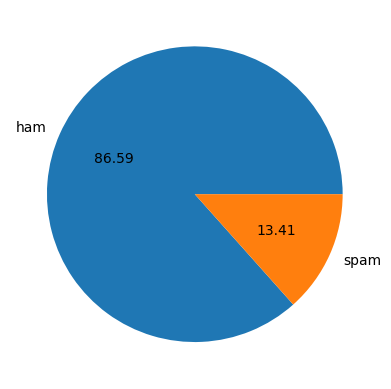

In [235]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels = ['ham', 'spam'], autopct="%0.2f")
plt.show()


In [236]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pradh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [237]:
#adding some columns
#1 col- number of characters, 2nd col-number of sentences, 3rd-col, number of words
def count(x):
    return len(x)
def word_count(x):
    words_array = x.split(' ')
    return len(words_array)
df['chars'] = df['message'].apply(count)
df['word count'] = df['message'].apply(lambda x: len(x.split(' ')))
df['sentence count'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

,label,message,length,punct,chars,word count,sentence count
0,0,"Go until jurong point, crazy.. Available only ...",111,9,111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,155,28,2
3,0,U dun say so early hor... U c already then say...,49,6,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2,61,13,1
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,8,160,30,4
5568,0,Will ü b going to esplanade fr home?,36,1,36,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,7,57,10,2
5570,0,The guy did some bitching but I acted like i'd...,125,1,125,26,1


In [238]:
df[['chars', 'word count', 'sentence count']].describe()

,chars,word count,sentence count
count,5572.000000,5572.000000,5572.000000
mean,80.490309,15.709440,2.006102
std,59.944527,11.493753,1.539977
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,62.000000,12.000000,2.000000
75%,122.000000,23.000000,3.000000
max,910.000000,171.000000,38.000000


In [239]:
df[df['label']== 0][['chars', 'word count', 'sentence count']].describe()

,chars,word count,sentence count
count,4825.000000,4825.000000,4825.000000
mean,71.482902,14.433161,1.846010
std,58.442635,11.628301,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,93.000000,19.000000,2.000000
max,910.000000,171.000000,38.000000


In [240]:
df[df['label']== 1][['chars', 'word count', 'sentence count']].describe()
#we'll note that spam messages on average have a higher-set distribution of char0count in messages, but a lower range of char count
#this holds true across each quartile as well

,chars,word count,sentence count
count,747.000000,747.000000,747.000000
mean,138.670683,23.953146,3.040161
std,28.873603,5.794904,1.548499
min,13.000000,2.000000,1.000000
25%,133.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,223.000000,35.000000,9.000000


(array([  2.,   1.,   4.,   2.,   6.,   8.,   1.,   6.,  16.,   8.,   7.,
          9.,  15.,  22.,  17.,  26.,  26.,  69.,  75., 111., 222.,  79.,
          7.,   3.,   3.,   0.,   1.,   0.,   0.,   1.]),
 array([ 13.,  20.,  27.,  34.,  41.,  48.,  55.,  62.,  69.,  76.,  83.,
         90.,  97., 104., 111., 118., 125., 132., 139., 146., 153., 160.,
        167., 174., 181., 188., 195., 202., 209., 216., 223.]),
 <BarContainer object of 30 artists>)

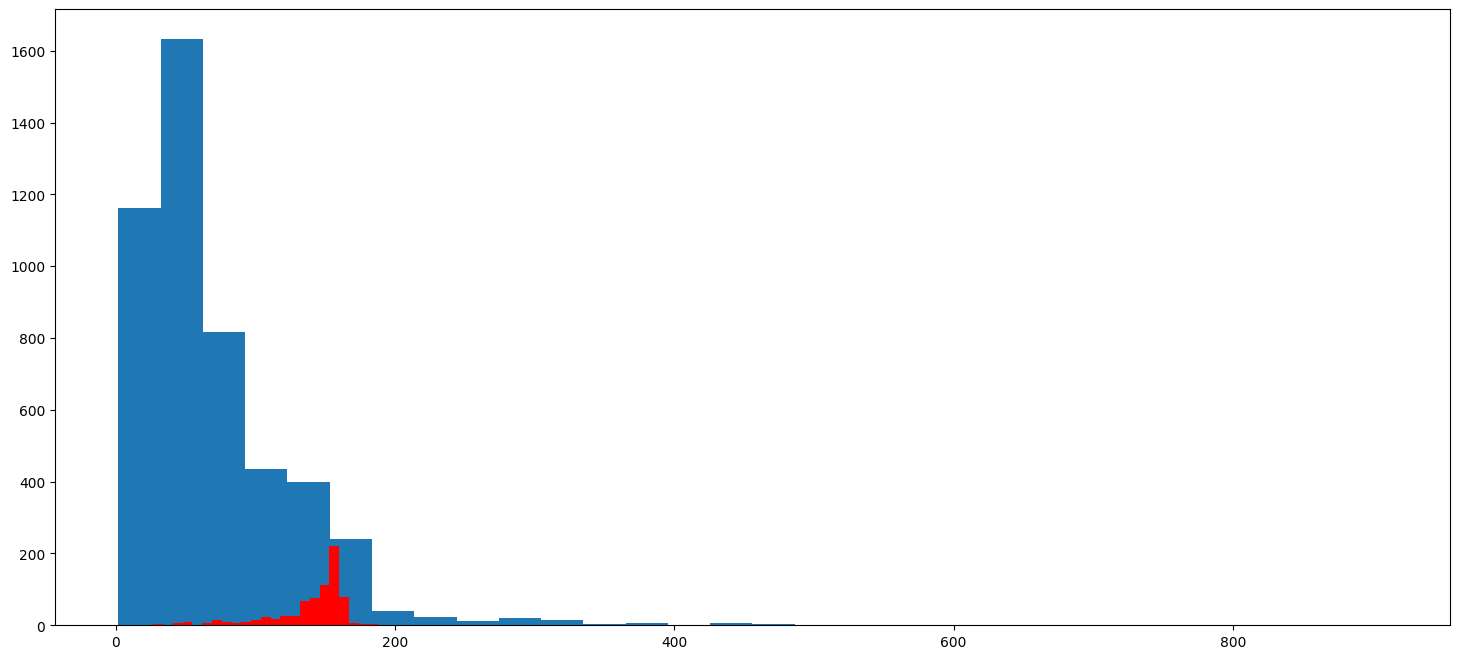

In [241]:
plt.figure(figsize = (18, 8))
plt.hist(df[df['label'] == 0]['chars'], bins = 30)
plt.hist(df[df['label'] == 1]['chars'], bins = 30, color = 'red')
#this allows us to visualize that on avg, spam msgs have lower char counts

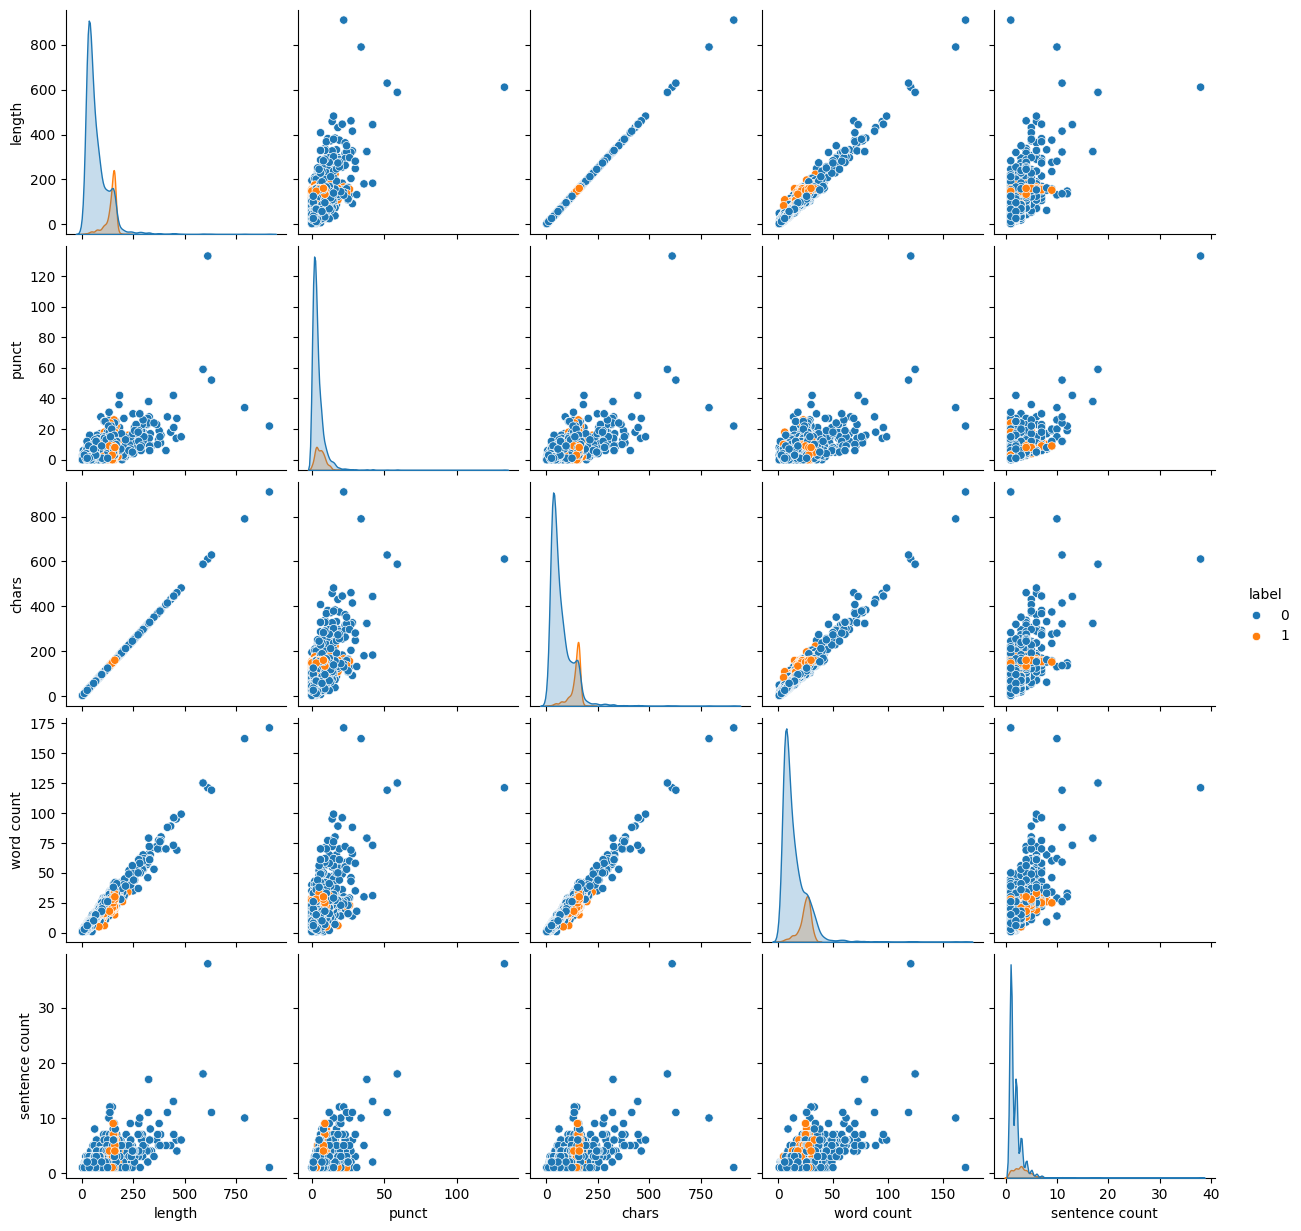

In [242]:
import seaborn as sns
sns.pairplot(data = df, hue='label')

3. Now for data pre-processing
   - lower case
   - tokenization
   - removing special characters
   - removing stpo words and punctuation
   - stemming #converting groups of similar words to one word

In [257]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stopwords.words('english') # prints all of the words considered to be stopwords
string.punctuation #imports all of the punctuation marks

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [258]:
def transform_text(text):
    text = text.lower() #convert our text to lower case
    text = nltk.word_tokenize(text) #NOW to convert words to tokens
    
    y = []
    
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation : 
            #this above condition only appends words if...
            #they are alphanumeric words (not special characters)
            #they are NOT english stopwords
            #they are NOT punctuation marks 
            #this helps us remove conditions, special characters, and stop words
            y.append(ps.stem(i)) #stems any prefixes and suffixes that we don't needl 

    
    return y

In [259]:
transform_text('Did you liking my presentaiton on ML?')

['like', 'presentaiton', 'ml']

In [260]:

ps.stem('dancing') #this is our stemming technique, returns the root word

'danc'

In [261]:
#now that we;ve created a method to ttransform oru message, let's add to our dataframe
df['transformed_msg'] = df['message'].apply(transform_text)
df

,label,message,length,punct,chars,word count,sentence count,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,9,111,20,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,6,29,6,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,155,28,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,6,49,11,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2,61,13,1,"[nah, think, goe, usf, live, around, though]"
...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,8,160,30,4,"[2nd, time, tri, 2, contact, u, pound, prize, ..."
5568,0,Will ü b going to esplanade fr home?,36,1,36,8,1,"[ü, b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,7,57,10,2,"[piti, mood, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,125,1,125,26,1,"[guy, bitch, act, like, interest, buy, someth,..."


In [262]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_msg'].tolist():
    for word in msg:
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'ur'),
  Text(5, 0, 'u'),
  Text(6, 0, 'text'),
  Text(7, 0, 'mobil'),
  Text(8, 0, '4'),
  Text(9, 0, 'stop'),
  Text(10, 0, 'claim'),
  Text(11, 0, 'repli'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'tone'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'new'),
  Text(18, 0, 'nokia'),
  Text(19, 0, 'award'),
  Text(20, 0, 'urgent'),
  Text(21, 0, 'week'),
  Text(22, 0, 'cash'),
  Text(23, 0, 'win'),
  Text(24, 0, 'contact'),
  Text(25, 0, 'pleas'),
  Text(26, 0, 'phone'),
  Text(27, 0, 'c'),
  Text(28, 0, 'custom'),
  Text(29, 0, 'guarante')])

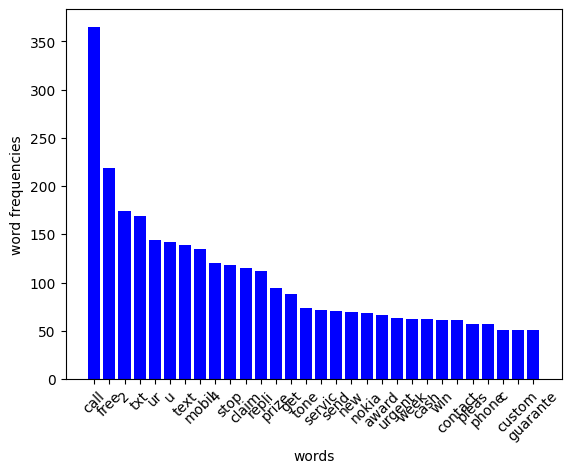

In [254]:
from collections import Counter
sc_counter = Counter(spam_corpus).most_common(30) #this creates a frequency dictionary of most frequent words
                     #we'll print the 30 most common words in our data

#Let's make a dataframe our of this, and make a barplot out of this
x = []
y = []
for tuple in sc_counter:
    x.append(tuple[0])
    y.append(tuple[1])

plt.bar(x, y, color = 'blue')
plt.xlabel('words')
plt.ylabel('word frequencies')
plt.xticks(rotation=45)

In [255]:
ham_corpus = []
for msg in df[df['label']==0]['transformed_msg'].tolist():
    for word in msg:
        ham_corpus.append(word)
print(len(ham_corpus))

38818


In [ ]:
hc_counter = Counter(ham_corpus).most_common(30)
x = []
y = []
for tuple in hc_counter:
    x.append(tuple[0])
    y.append(tuple[1])

plt.bar(x, y, color = 'blue')
plt.xlabel('words')
plt.ylabel('word frequencies')
plt.xticks(rotation=45)

plt.show()

4. Model Building

In [ ]:
#We will use a naive-mayes model for best model performance with text data

In [ ]:
#Step 1: We will vectorize our data 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000) #adding a max_features parameter


In [ ]:
df['transformed_msg'] = df['transformed_msg'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df['transformed_msg'] 

X = tfidf.fit_transform(df['transformed_msg']).toarray()
# X = scaler.fit_transform(X) #the second time around, we improve preprocessing by scaling our X-data
#the reason why any scaler-related imports and changes are commented out:
# IT WAS found that although scaling our x improved accuracy by ~0.01, it reduced precision by several %-points
#Therefore, I decided to remove the scaler

In [ ]:
X.shape 

In [ ]:
y = df['label'].values
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#I am using three different types of Naive-bayes models, 
#and will be using accuracy score and precision score as the performance metric for these models
#Below, I will be training and testing each of these three models

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("***GaussianNB Model***")
print("Accuracy Score: ", accuracy_score(y_test, y_pred1))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred1))
print("Precision Score: ", precision_score(y_test, y_pred1))

In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("***MultinomialNB Model***")
print("Accuracy Score: ", accuracy_score(y_test, y_pred2))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred2))
print("Precision Score: ", precision_score(y_test, y_pred2))

In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("***BernoulliNB Model***")
print("Accuracy Score: ", accuracy_score(y_test, y_pred3))
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred3))
print("Precision Score: ", precision_score(y_test, y_pred3))


5. Model Evaluation & Improvement

In [ ]:
#First, let's change the max_features parameter for TfIdf

In [249]:
import streamlit as st
import subprocess

In [250]:
st.title("Email/SMS Spam Classifier")
input = st.text_input("Input text here")

transformed_text = transform_text(input)
vector_input = tfidf.transform(transformed_text)

result = model.predict(vector_input)[0]

if result == 1:
    st.header("Message: Spam")
else:
    st.header("Message: Not Spam")

subprocess.run(["streamlit", "run", "app.py"])


ValueError: Found array with 0 sample(s) (shape=(0, 3000)) while a minimum of 1 is required by TfidfTransformer.